In [ ]:
!pip install transformers
!pip install Pillow
!pip install matplotlib

In [ ]:
!git clone https://github.com/Springboard-Internship-2024/Interactive-AI-storyteller_oct_2024.git

Cloning into 'Interactive-AI-storyteller_oct_2024'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import torch
# Load the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Saving hunted house.jpg to hunted house (1).jpg


Saving gost.jpg to gost.jpg


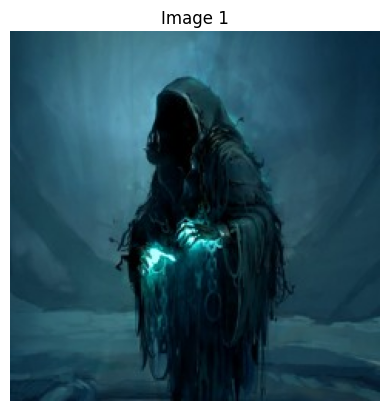

In [ ]:
from google.colab import files

# Upload image files
uploaded_files = files.upload()
uploaded_files = files.upload()

images = []
for file_name in uploaded_files.keys():
    img = Image.open(file_name)
    images.append(img)

# Display the uploaded images
for i, img in enumerate(images):
    plt.figure()
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()


In [ ]:
def generate_caption(image):
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# Generate captions for all uploaded images
captions = []
for img in images:
    captions.append(generate_caption(img))

# Display the generated captions
for i, caption in enumerate(captions):
    print(f"Image {i+1} caption: {caption}")


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Image 1 caption: the cover art for the game's upcoming album, the dark side


In [ ]:
def build_story(captions):
    story = "Once upon a time, "
    for i, caption in enumerate(captions):
        if i == 0:
            story += caption + "."
        else:
            story += " Then, " + caption + "."
    story += " And they all lived happily ever after."
    return story

# Create a story
story = build_story(captions)

# Print the story
print("Generated Story:")
print(story)

Generated Story:
Once upon a time, the cover art for the game's upcoming album, the dark side. And they all lived happily ever after.


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model_gpt2 = GPT2LMHeadModel.from_pretrained("gpt2")

def enhance_story(story):
    inputs = tokenizer(story, return_tensors="pt", max_length=1024, truncation=True)
    outputs = model_gpt2.generate(inputs['input_ids'], max_length=1024, num_return_sequences=1)
    enhanced_story = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return enhanced_story

# Enhance the story with GPT-2
enhanced_story = enhance_story(story)
print("Enhanced Story:")
print(enhanced_story)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Enhanced Story:
Once upon a time, a creepy house in the woods with a full moon in the sky. And they all lived happily ever after.

The story of the house is told in the book, The House of the Dead. It's a story of a family that lived in a house that was haunted by a ghost. The ghost was a young woman named Mary. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been living in the house for a long time. She was a young woman who had been liv

In [ ]:
# Save the story as a text file
with open("generated_story.txt", "w") as file:
    file.write(enhanced_story)


In [ ]:
def build_story(captions):
    story = "Once upon a time, "
    for i, caption in enumerate(captions):
        if i == 0:
            story += caption + "."
        else:
            story += " Then, " + caption + "."
    story += " And they all lived happily ever after."
    return story

# Create a story
story = build_story(captions)

# Print the story
print("Generated Story:")
print(story)

Generated Story:
Once upon a time, the cover art for the game's upcoming album, the dark side. And they all lived happily ever after.


Saving gost.jpg to gost (1).jpg
Saving hunted house.jpg to hunted house (2).jpg


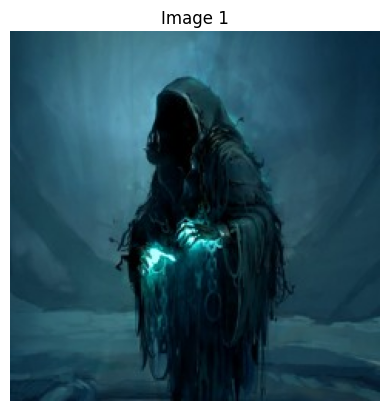

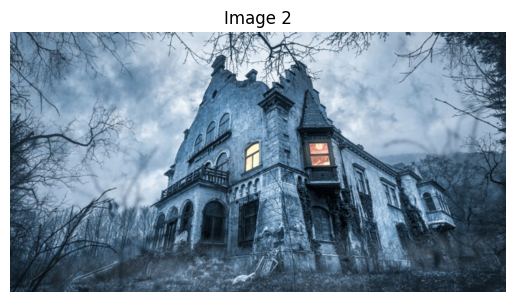

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generated Long Story:

Once upon a time, there was a series of events that unfolded:

It all started when the cover art for the game's upcoming album, the dark side.
Then, a creepy house in the woods with a full moon in the sky.
In the end, everything came together in harmony.
The story has been saved as 'long_story.txt'.


In [ ]:
# Import necessary libraries
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration

# Step 1: Upload multiple images
uploaded_files = files.upload()

# Step 2: Open and display images
images = []
for file_name in uploaded_files.keys():
    img = Image.open(file_name)
    images.append(img)

for i, img in enumerate(images):
    plt.figure()
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()

# Step 3: Load BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image):
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# Step 4: Generate captions for all images
captions = []
for img in images:
    captions.append(generate_caption(img))

# Step 5: Build a long story from captions
def build_long_story(captions):
    story = "Once upon a time, there was a series of events that unfolded:\n\n"

    for i, caption in enumerate(captions):
        if i == 0:
            story += f"It all started when {caption}.\n"
        else:
            story += f"Then, {caption}.\n"

    story += "In the end, everything came together in harmony."
    return story

long_story = build_long_story(captions)

# Step 6: Print the story
print("Generated Long Story:\n")
print(long_story)

# Step 7: Save the long story as a text file
with open("long_story.txt", "w") as file:
    file.write(long_story)

print("The story has been saved as 'long_story.txt'.")


Saving gost.jpg to gost (2).jpg
Saving hunted house.jpg to hunted house (3).jpg
Saving murder to murder


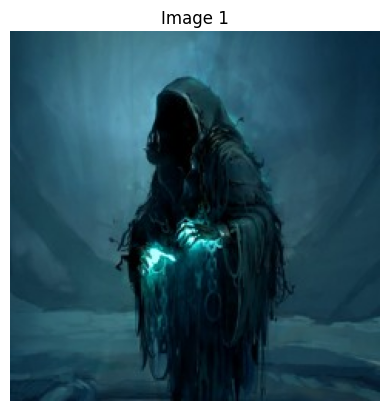

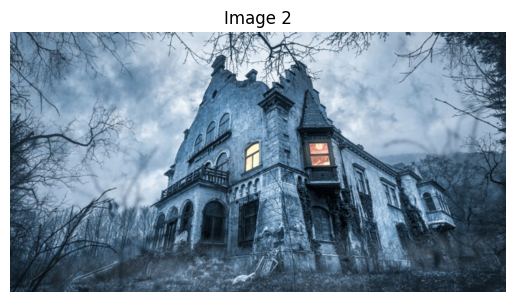

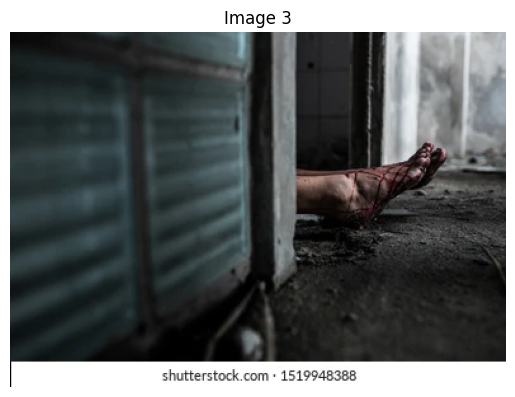

Generated Long Story:

Once upon a time, there was a series of events that unfolded:

It all started when the cover art for the game's upcoming album, the dark side.
Then, a creepy house in the woods with a full moon in the sky.
Then, a person's feet are seen in a hallway.
In the end, everything came together in harmony.
The story has been saved as 'long_story.txt'.


In [ ]:
# Import necessary libraries
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration

# Step 1: Upload multiple images
uploaded_files = files.upload()

# Step 2: Open and display images
images = []
for file_name in uploaded_files.keys():
    img = Image.open(file_name)
    images.append(img)

for i, img in enumerate(images):
    plt.figure()
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()

# Step 3: Load BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image):
    inputs = processor(images=image, return_tensors="pt")
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# Step 4: Generate captions for all images
captions = []
for img in images:
    captions.append(generate_caption(img))

# Step 5: Build a long story from captions
def build_long_story(captions):
    story = "Once upon a time, there was a series of events that unfolded:\n\n"

    for i, caption in enumerate(captions):
        if i == 0:
            story += f"It all started when {caption}.\n"
        else:
            story += f"Then, {caption}.\n"

    story += "In the end, everything came together in harmony."
    return story

long_story = build_long_story(captions)

# Step 6: Print the story
print("Generated Long Story:\n")
print(long_story)

# Step 7: Save the long story as a text file
with open("long_story.txt", "w") as file:
    file.write(long_story)

print("The story has been saved as 'long_story.txt'.")
